## Titanic - Machine Learning from Disaster

### Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.concat([train, test], ignore_index=True)

In [36]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [38]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [39]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [40]:
full.duplicated().sum()

0

#### There is no duplicated data

### Data Visualization & Data Exploration

In [41]:
def histogram_boxplot(data, feature, figsize=(12, 8), dpi=100, kde=False, bins=50):
    """
    Histogram and boxplot for a given feature
    
    Args:
        data: dataframe
        feature: str, feature name
        figsize: tuple, figure size
        dpi: int, figure dpi
        kde: bool, whether to plot kde
        bins: int, number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(2,
                                           sharex=True,
                                           gridspec_kw={'height_ratios': (.15, .85)},
                                           figsize=figsize,
                                           dpi=dpi)

    sns.boxplot(data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='red',
                meanline=True)

    sns.histplot(data[feature],
                 ax=ax_hist,
                 kde=kde,
                 bins=bins)

    ax_hist.axvline(data[feature].mean(),
                    color='green',
                    linestyle='--')

    ax_hist.axvline(data[feature].median(),
                    color='black',
                    linestyle='-')

    ax_box.set_title(f'{feature}', fontsize=15)


In [42]:
def stacked_barplot(data, predictor, target):
    """
    Stacked barplot
    
    Args:
        data: dataframe
        predictor: str, predictor name
        target: str, target name
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab_1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)

    print(tab_1)
    print('----------------------DIVIDED-------------------------')

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

    fig, ax = plt.subplots(figsize=(count + 5, 5), dpi=100)

    tab.plot(kind='bar', stacked=True, ax=ax)

    plt.xticks(rotation=0)

    plt.show()

In [43]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Labeled barplot
    
    Args:
        data: dataframe
        feature: str, feature name
        perc: bool, whether to show percentage
        n: int, number of bars to show
    """

    total = len(data[feature])
    # the total number of observations
    count = data[feature].nunique()
    # total number of unique values

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)
        # build the figure with the given size

    ax = sns.countplot(data=data,
                       x=feature,
                       palette='Set2',
                       order=data[feature].value_counts().index[:n]
                       )
    # countplot for the given feature

    for p in ax.patches:
        if perc == True:
            label = f"{round((p.get_height() / total) * 100, 2)} %"
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(label,
                    (x, y),
                    ha='center',
                    va='center',
                    fontsize=11,
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.xticks(rotation=0)
    plt.xlabel(feature, fontsize=15, weight='bold')
    plt.ylabel('Count', fontsize=15, weight='bold')
    plt.title(f'{feature} Distribution by Count', fontsize=15, weight='bold')

    plt.show()

In [44]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=100)

    target_uniques = data[target].unique()
    # get the unique values of the target

    axes[0, 0].set_title(f"Distribution of target for target = {target_uniques[0]}", fontsize=15)
    # set the title of the first plot

    sns.histplot(
        data=data[data[target] == target_uniques[0]],
        x=predictor,
        kde=True,
        ax=axes[0, 0],
        color='teal',
        stat='density'
    )
    # plot the first plot

    axes[0, 1].set_title(f"Distribution of target for target = {target_uniques[1]}", fontsize=15)
    # set the title of the second plot

    sns.histplot(
        data=data[data[target] == target_uniques[1]],
        x=predictor,
        kde=True,
        ax=axes[0, 1],
        color='teal',
        stat='density'
    )

    axes[1, 0].set_title('Boxplot w.r.t target', fontsize=15)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 0],
        showmeans=True,
        palette='gist_rainbow'
    )

    axes[1, 1].set_title('Violinplot w.r.t target', fontsize=15)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 1],
        showmeans=True,
        palette='gist_rainbow'
    )

    plt.tight_layout()
    plt.show()

### Univariant Analysis

In [45]:
full.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [46]:
full.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


### Age

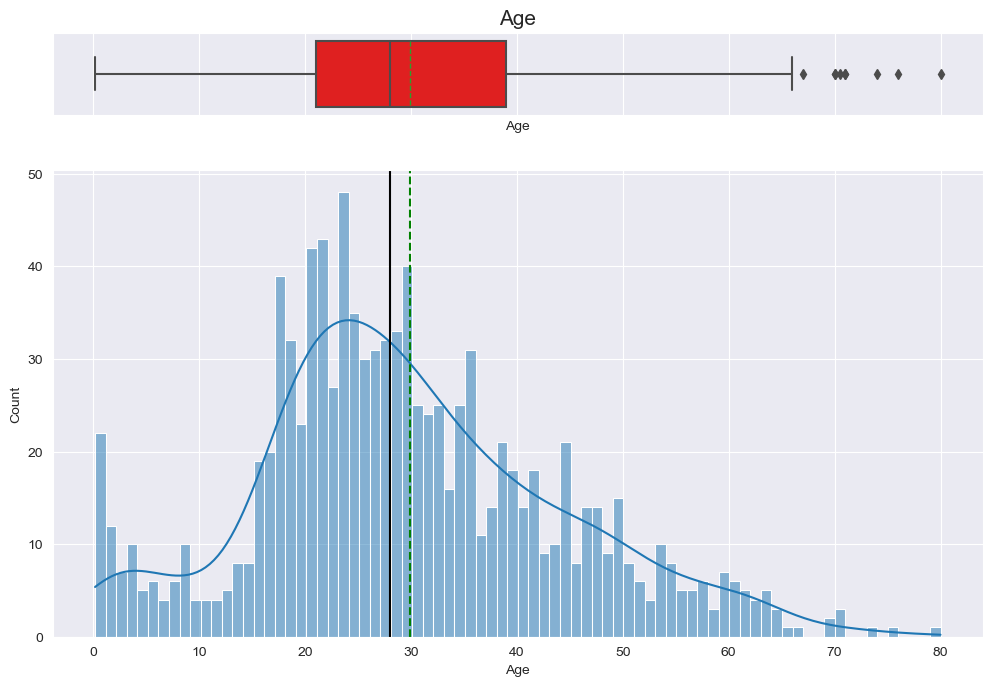

In [47]:
histogram_boxplot(full, 'Age', kde=True, bins=80)

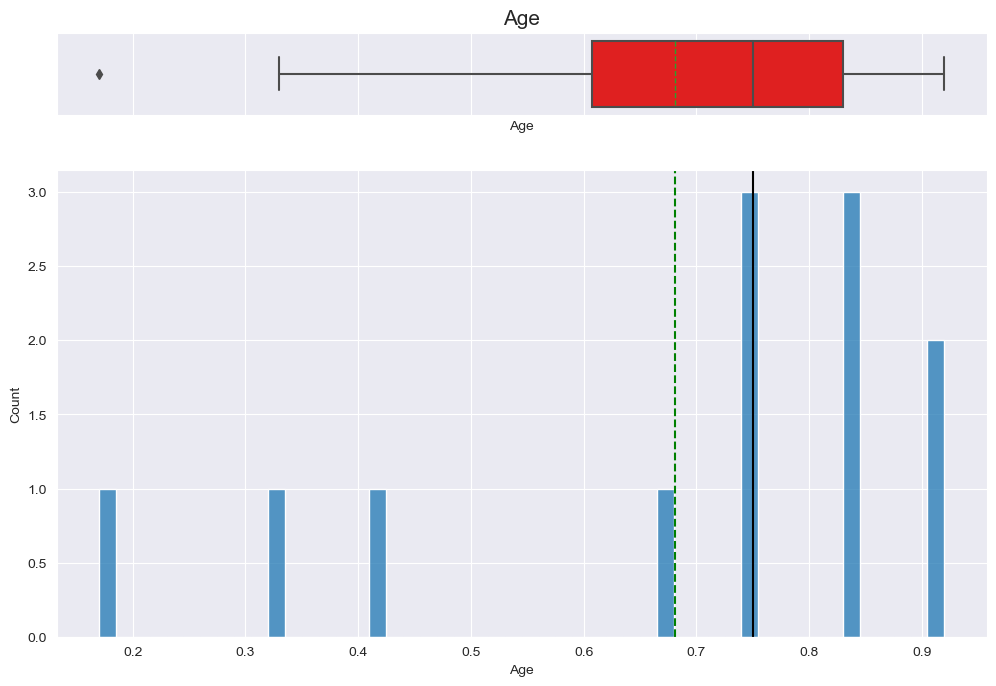

In [48]:
histogram_boxplot(full.loc[full.Age < 1], 'Age')

In [49]:
full.loc[full.Age < 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1.0,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1.0,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1.0,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1.0,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1.0,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1.0,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1.0,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


There are some data points with age less than 1. We can assume that these are babies. We can replace these values with 0.5.

In [50]:
full.loc[full.Age < 1, 'Age'] = 0.5

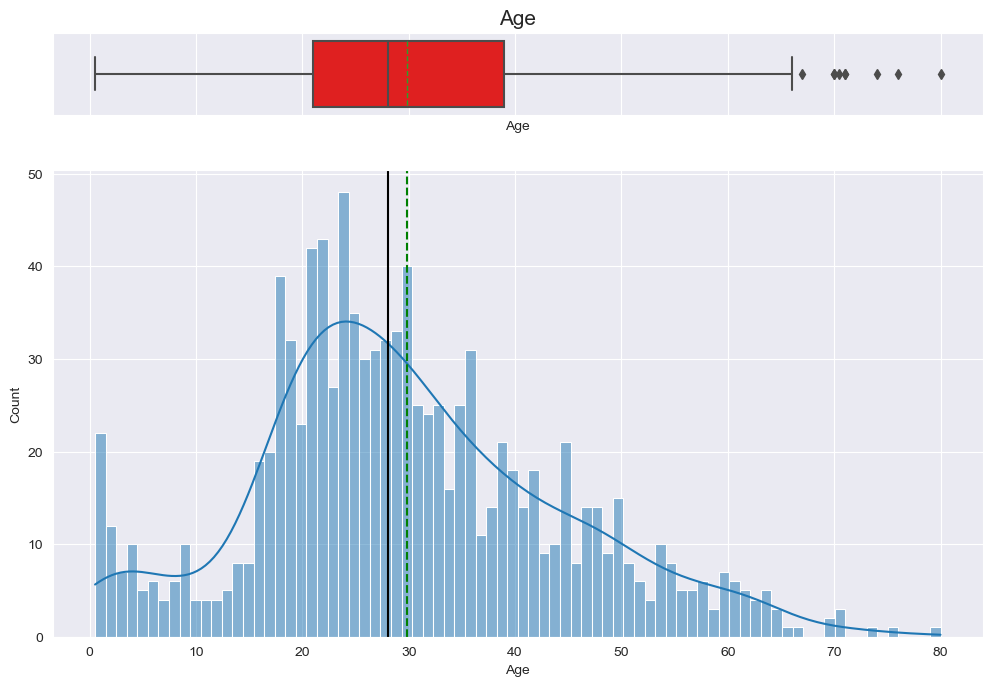

In [51]:
histogram_boxplot(full, 'Age', kde=True, bins=80)

### SibSp

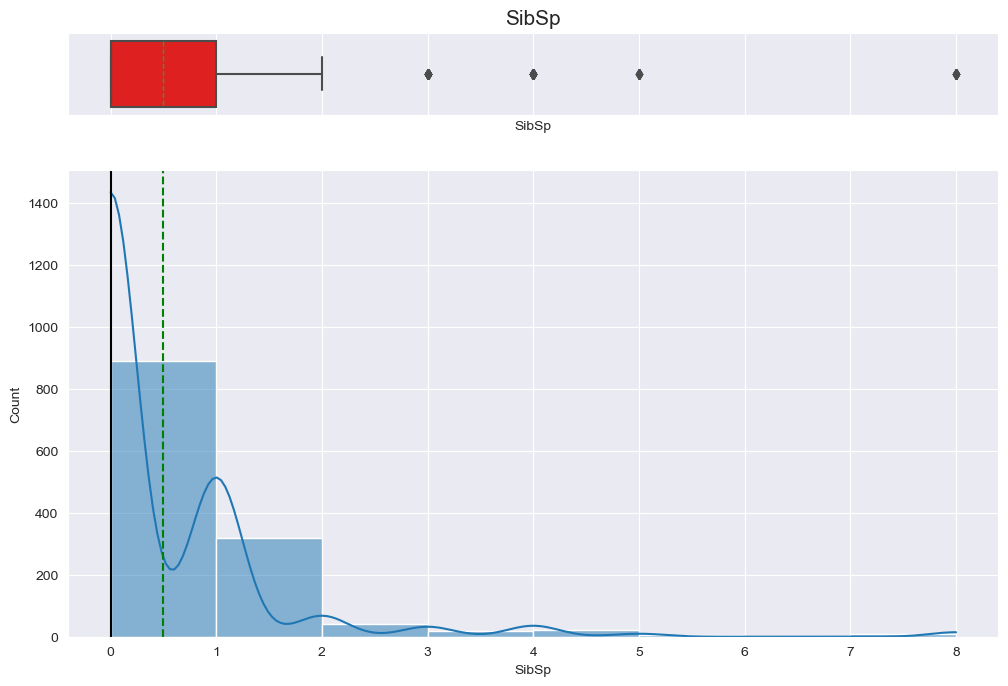

In [52]:
histogram_boxplot(full, 'SibSp', kde=True, bins=8)

Most of the passengers are alone. We can create a new feature called 'is_alone' to indicate whether the passenger is alone or not.

### Parch

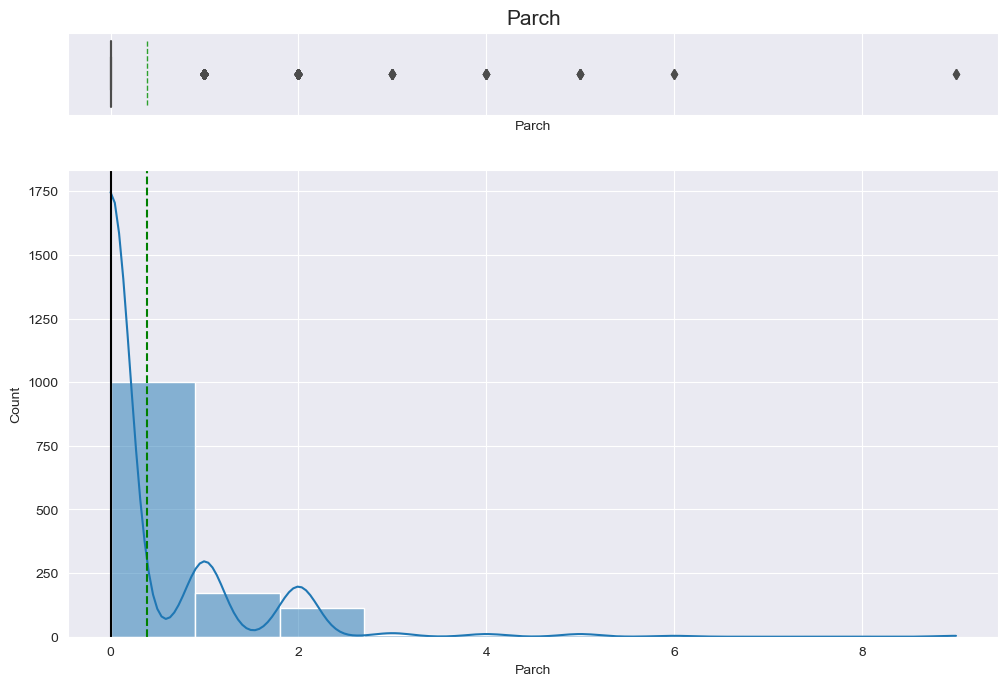

In [53]:
histogram_boxplot(full, 'Parch', kde=True, bins=10)

In [54]:
full.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

Most of the passengers are with 0 or 1 parent/child, we can group the passengers with 2 or more parent/child as 3.

In [55]:
full.loc[full.Parch > 2, 'Parch'] = 3

In [56]:
full.Parch.value_counts()

0    1002
1     170
2     113
3      24
Name: Parch, dtype: int64

### Fare

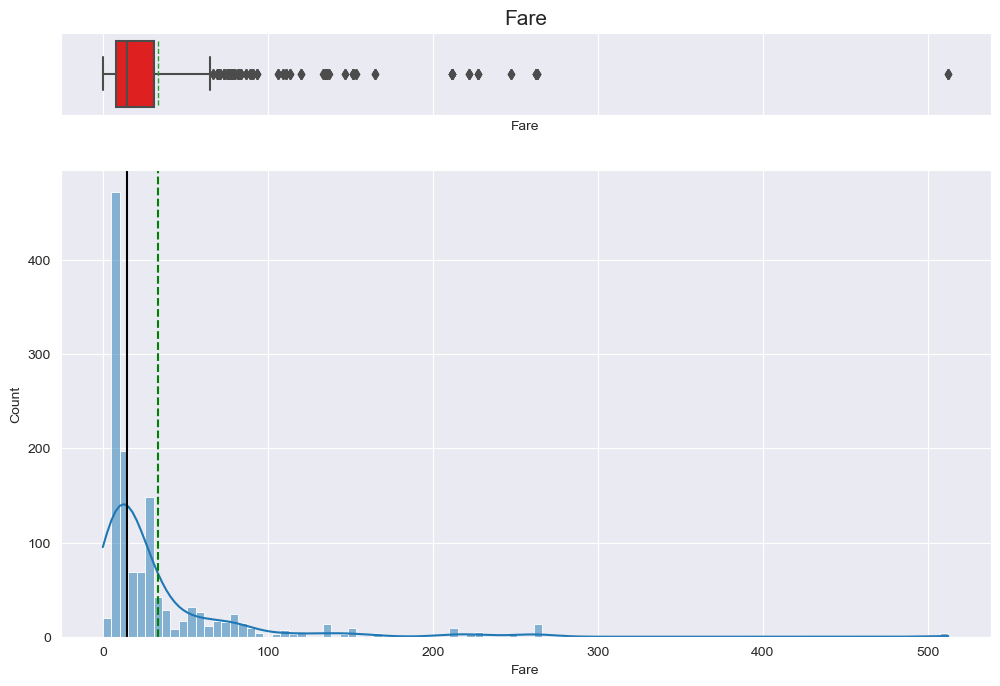

In [57]:
histogram_boxplot(full, 'Fare', kde=True, bins=100)

There are some outliers in the fare. We can remove these outliers.

In [58]:
full.Fare.sort_values(ascending=False)

258     512.3292
679     512.3292
1234    512.3292
737     512.3292
341     263.0000
          ...   
815       0.0000
302       0.0000
806       0.0000
263       0.0000
1043         NaN
Name: Fare, Length: 1309, dtype: float64

In [59]:
full.loc[full.Fare == max(full.Fare)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [60]:
full.loc[full.Fare == 263]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,3,19950,263.0,C23 C25 C27,S
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,3,19950,263.0,C23 C25 C27,S


In [61]:
full.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
815,816,0.0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


We will not remove the outliers because the maximum fare is not an outlier. It is the actual fare.

### Pclass

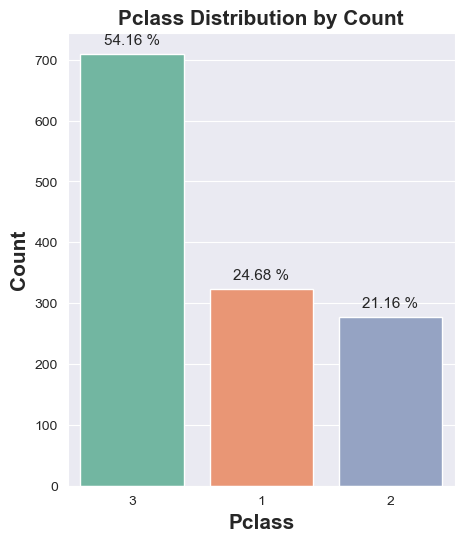

In [62]:
labeled_barplot(full, 'Pclass', perc=True)

The majority of the passengers are in the 3rd class.
The 1 & 2 class passengers are almost equal.

#### Sex

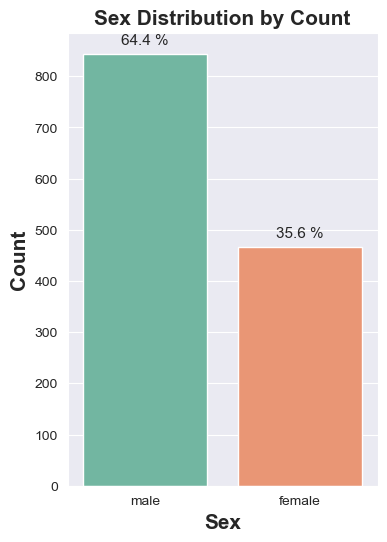

In [63]:
labeled_barplot(full, 'Sex', perc=True)

The male passengers are more than the female passengers.

### Bivariant Analysis

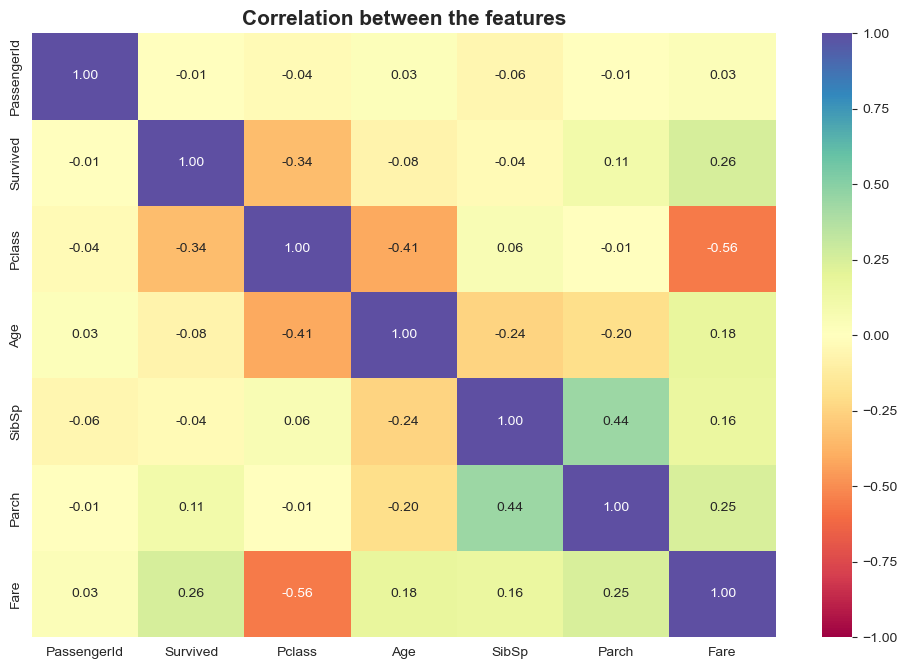

In [64]:
# let's see the correlation between the features

cols_list = full.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    full[cols_list].corr(),
    annot=True,
    fmt='.2f',
    cmap='Spectral',
    vmax=1,
    vmin=-1
)

plt.title('Correlation between the features', fontsize=15, weight='bold')
plt.show()

1. The correlation between the features is not high.
2. The correlation between the Pclass and the Survived is high which is a negative correlation. It means that the passengers in the 1st class have more chance to survive. And the Pclass is highly correlated with the Fare, which means that the passengers in the 1st class paid more (Makes sense).
3. And the Pclass is high negatively correlated with the Age, which means that the passengers in the 1st class are older than the passengers in the 3rd class.
4. The correlation between the SibSp and the Parch is high. It means that the passengers with more siblings/spouses have more parents/children.

#### Let's see the relationship between the Parch and the SibSp

In [65]:
full.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.879063,14.417691,0.5,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.357525,0.716066,0.0,0.0,0.0,0.0,3.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
